# Vec2Text Reproduction & Extension Analysis
### IR2 Group 00

In [1]:
import os
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import settings

warnings.filterwarnings('ignore')

Project Root: /gpfs/home1/scur2868/IR2/vec2text
Outputs Directory: /gpfs/home1/scur2868/IR2/vec2text/reproduction/outputs
Vec2Text Directory: /gpfs/home1/scur2868/IR2/vec2text


#### Effect of beam width on BLEU and Runtime (50 Steps)

In [2]:
data = pd.read_excel(os.path.join(settings.PROJECT_ROOT, "reproduction", "table1_reproduction_results_GTR32.xlsx"), skiprows=1)
# Convert 'Runtime (min)' from time format to total minutes
def time_to_minutes(time_obj):
    return time_obj.hour * 60 + time_obj.minute + time_obj.second / 60

data = data[data['Steps'] == 50]

data['Runtime (min)'] = data['Runtime (min)'].apply(time_to_minutes)
data['Runtime per sample (s)'] = (data['Runtime (min)'] * 60) / 1000

print(data.columns)
# data['BLEU-to-Runtime Ratio'] = data['BLEU'] * 100 / data['Runtime (min)']

# # Calculate BLEU Improvement
# data['BLEU Improvement'] = data['BLEU'].diff().fillna(0) * 100

Index(['Steps', 'Beam', 'Tokens', 'Pred Tokens', 'BLEU', 'TF1', 'Exact', 'Cos',
       'Runtime (min)', 'Peak Memory (MB)', 'Runtime per sample (s)'],
      dtype='object')


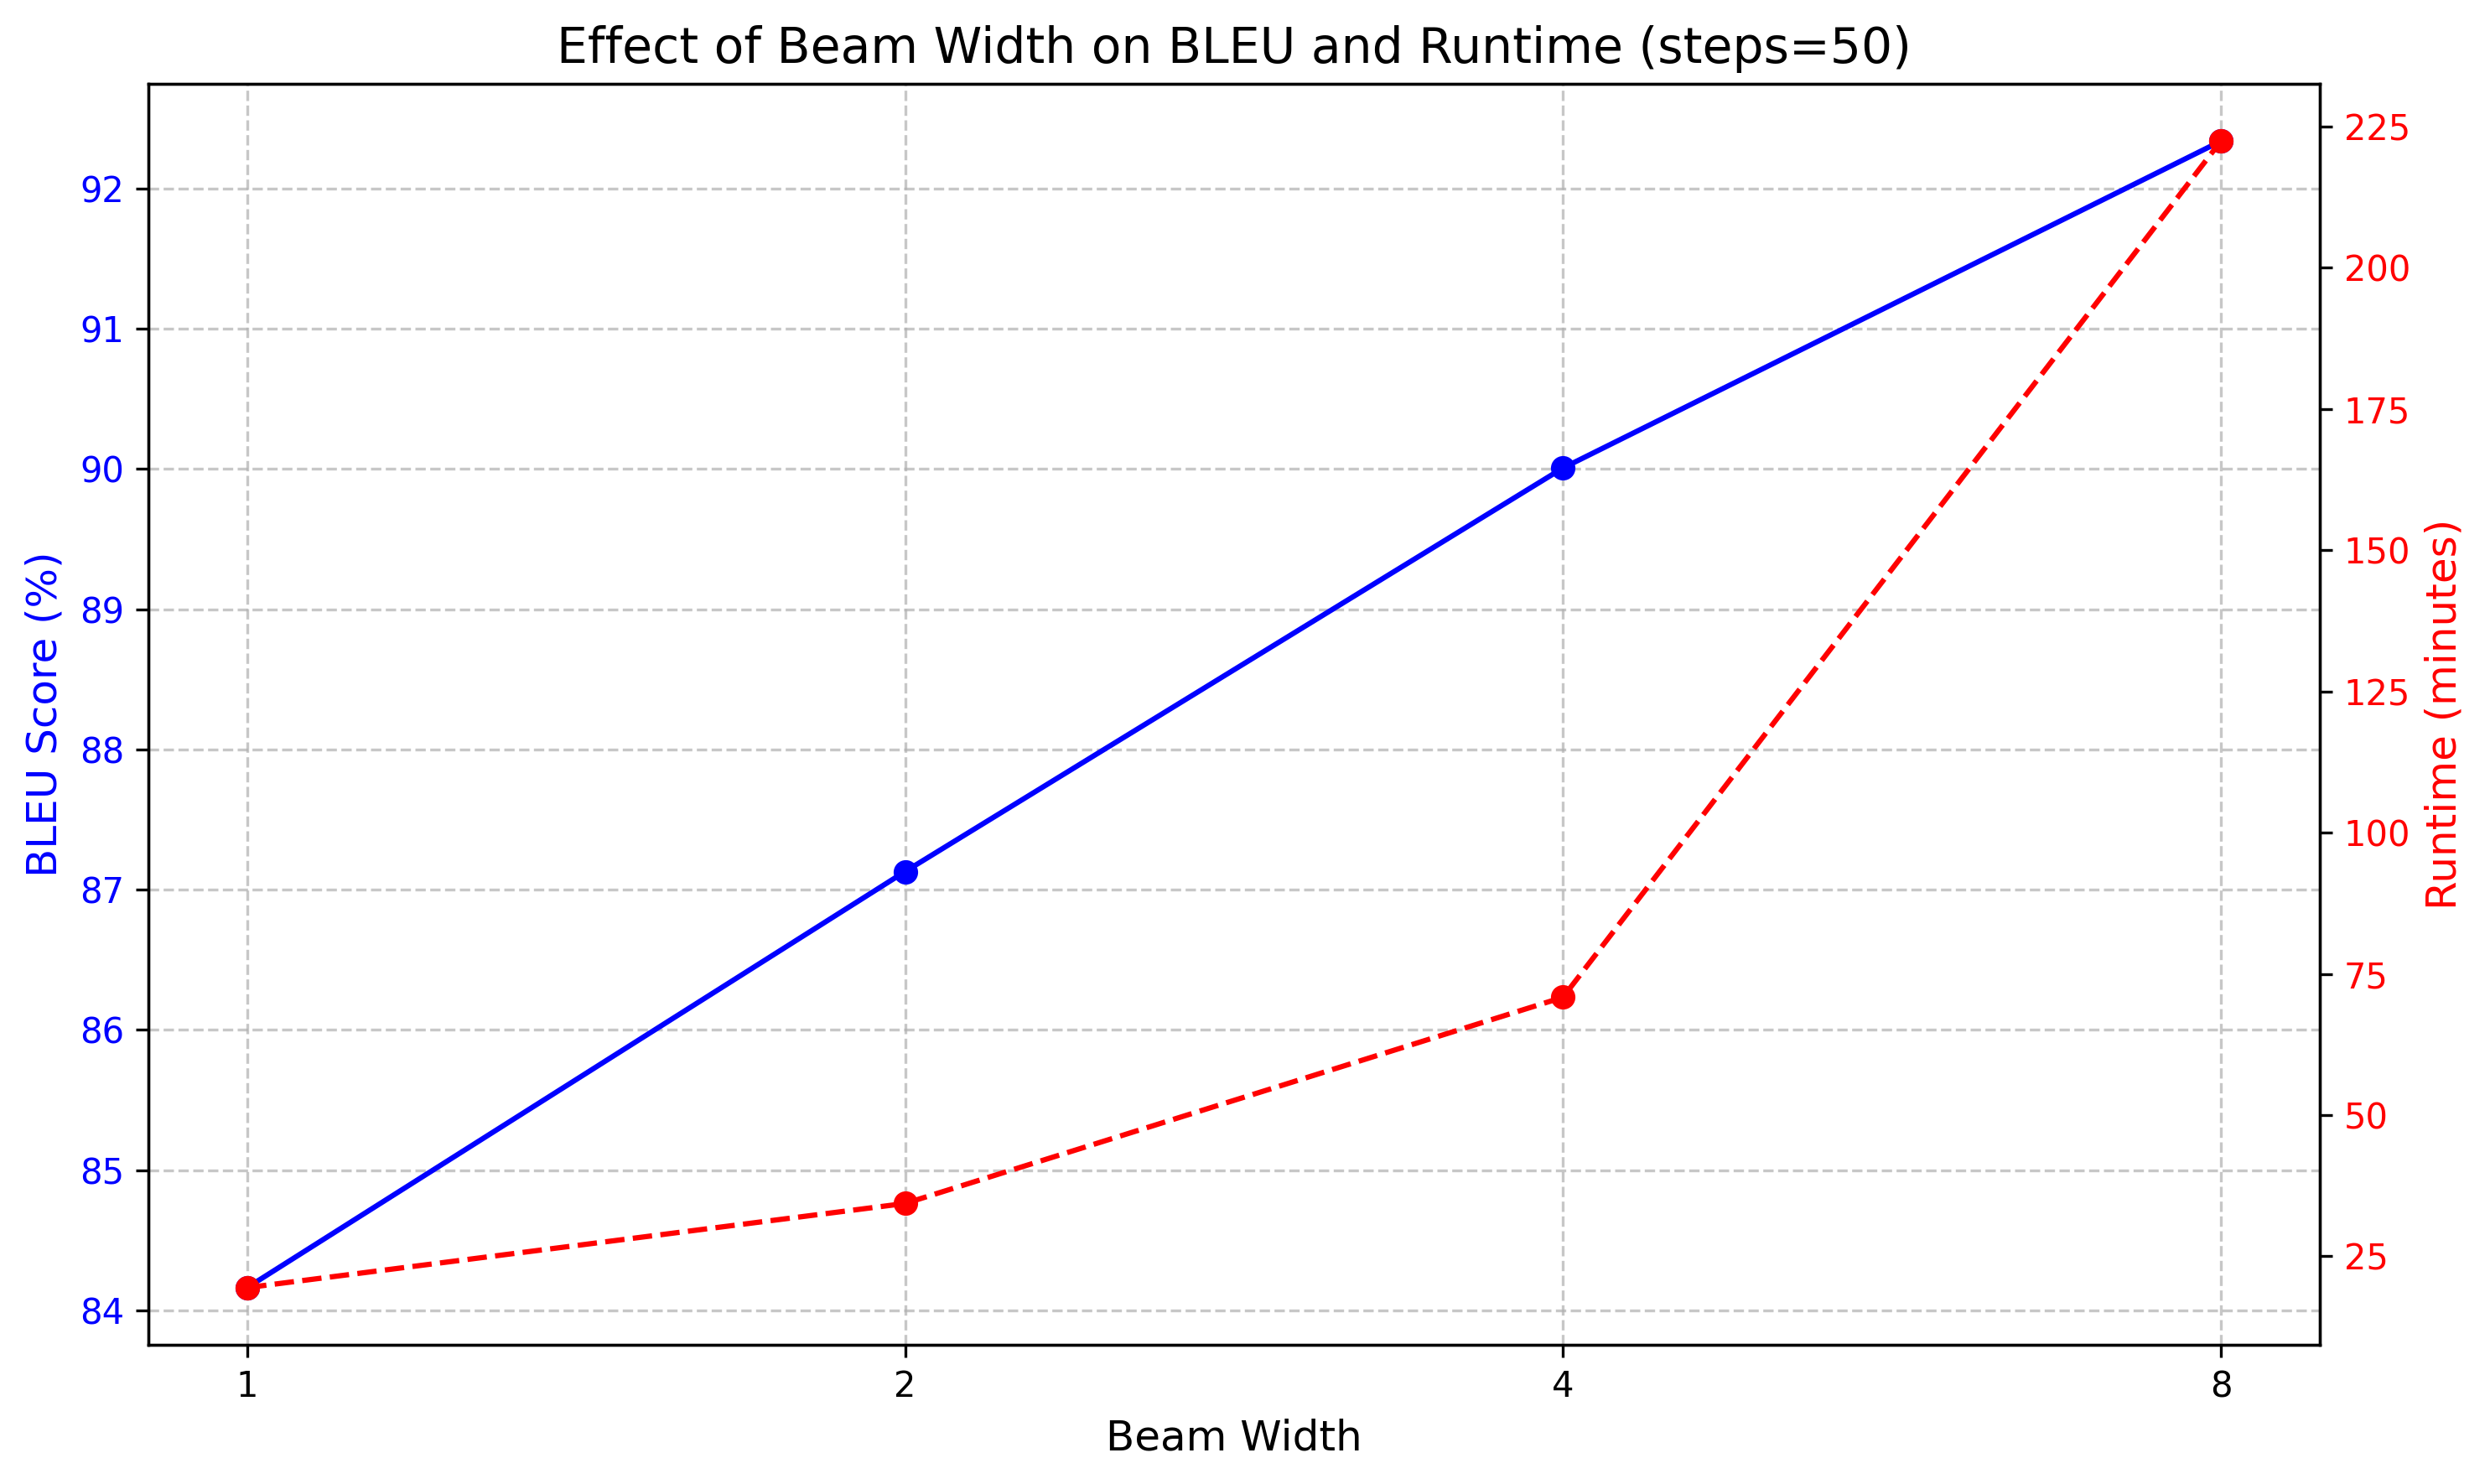

In [3]:
fig, ax1 = plt.subplots(figsize=(10, 6), dpi=300)

ax1.set_title('Effect of Beam Width on BLEU and Runtime (steps=50)', fontsize=14)
ax1.set_xlabel('Beam Width', fontsize=12)
ax1.set_xscale('log')
ax1.set_xticks([1, 2, 4, 8])
ax1.get_xaxis().set_major_formatter(plt.ScalarFormatter())
ax1.get_xaxis().set_minor_formatter(plt.NullFormatter())
ax1.tick_params(axis='x', which='minor', bottom=False)

# BLEU Score on the left y-axis
ax1.set_ylabel('BLEU Score (%)', fontsize=12, color='blue')
ax1.plot(data['Beam'], data['BLEU'] * 100, 'o-', color='blue', label='BLEU Score')
ax1.tick_params(axis='y', labelcolor='blue')

# Runtime on the right y-axis
ax2 = ax1.twinx()
ax2.set_ylabel('Runtime (minutes)', fontsize=12, color='red')
ax2.plot(data['Beam'], data['Runtime (min)'], 'o--', color='red', label='Runtime')
ax2.tick_params(axis='y', labelcolor='red')

# Annotate BLEU-to-Runtime Ratio on the plot
# for i, row in data.iterrows():
#     ax1.text(row['Beam'], row['BLEU'] * 100 + 0.5, f"{row['BLEU-to-Runtime Ratio']:.2f}", 
#              fontsize=12, color='green', ha='center')
# legend_text = (r"$\text{BLEU-to-Runtime Ratio} = \frac{\text{BLEU} (\%)}{\text{Runtime (min)}}$")
# fig.text(0.11, 0.91, legend_text, fontsize=10, color='green', va='top', ha='left')

# Gridlines and layout
ax1.grid(visible=True, linestyle='--', alpha=0.7)
fig.tight_layout()
plt.show()

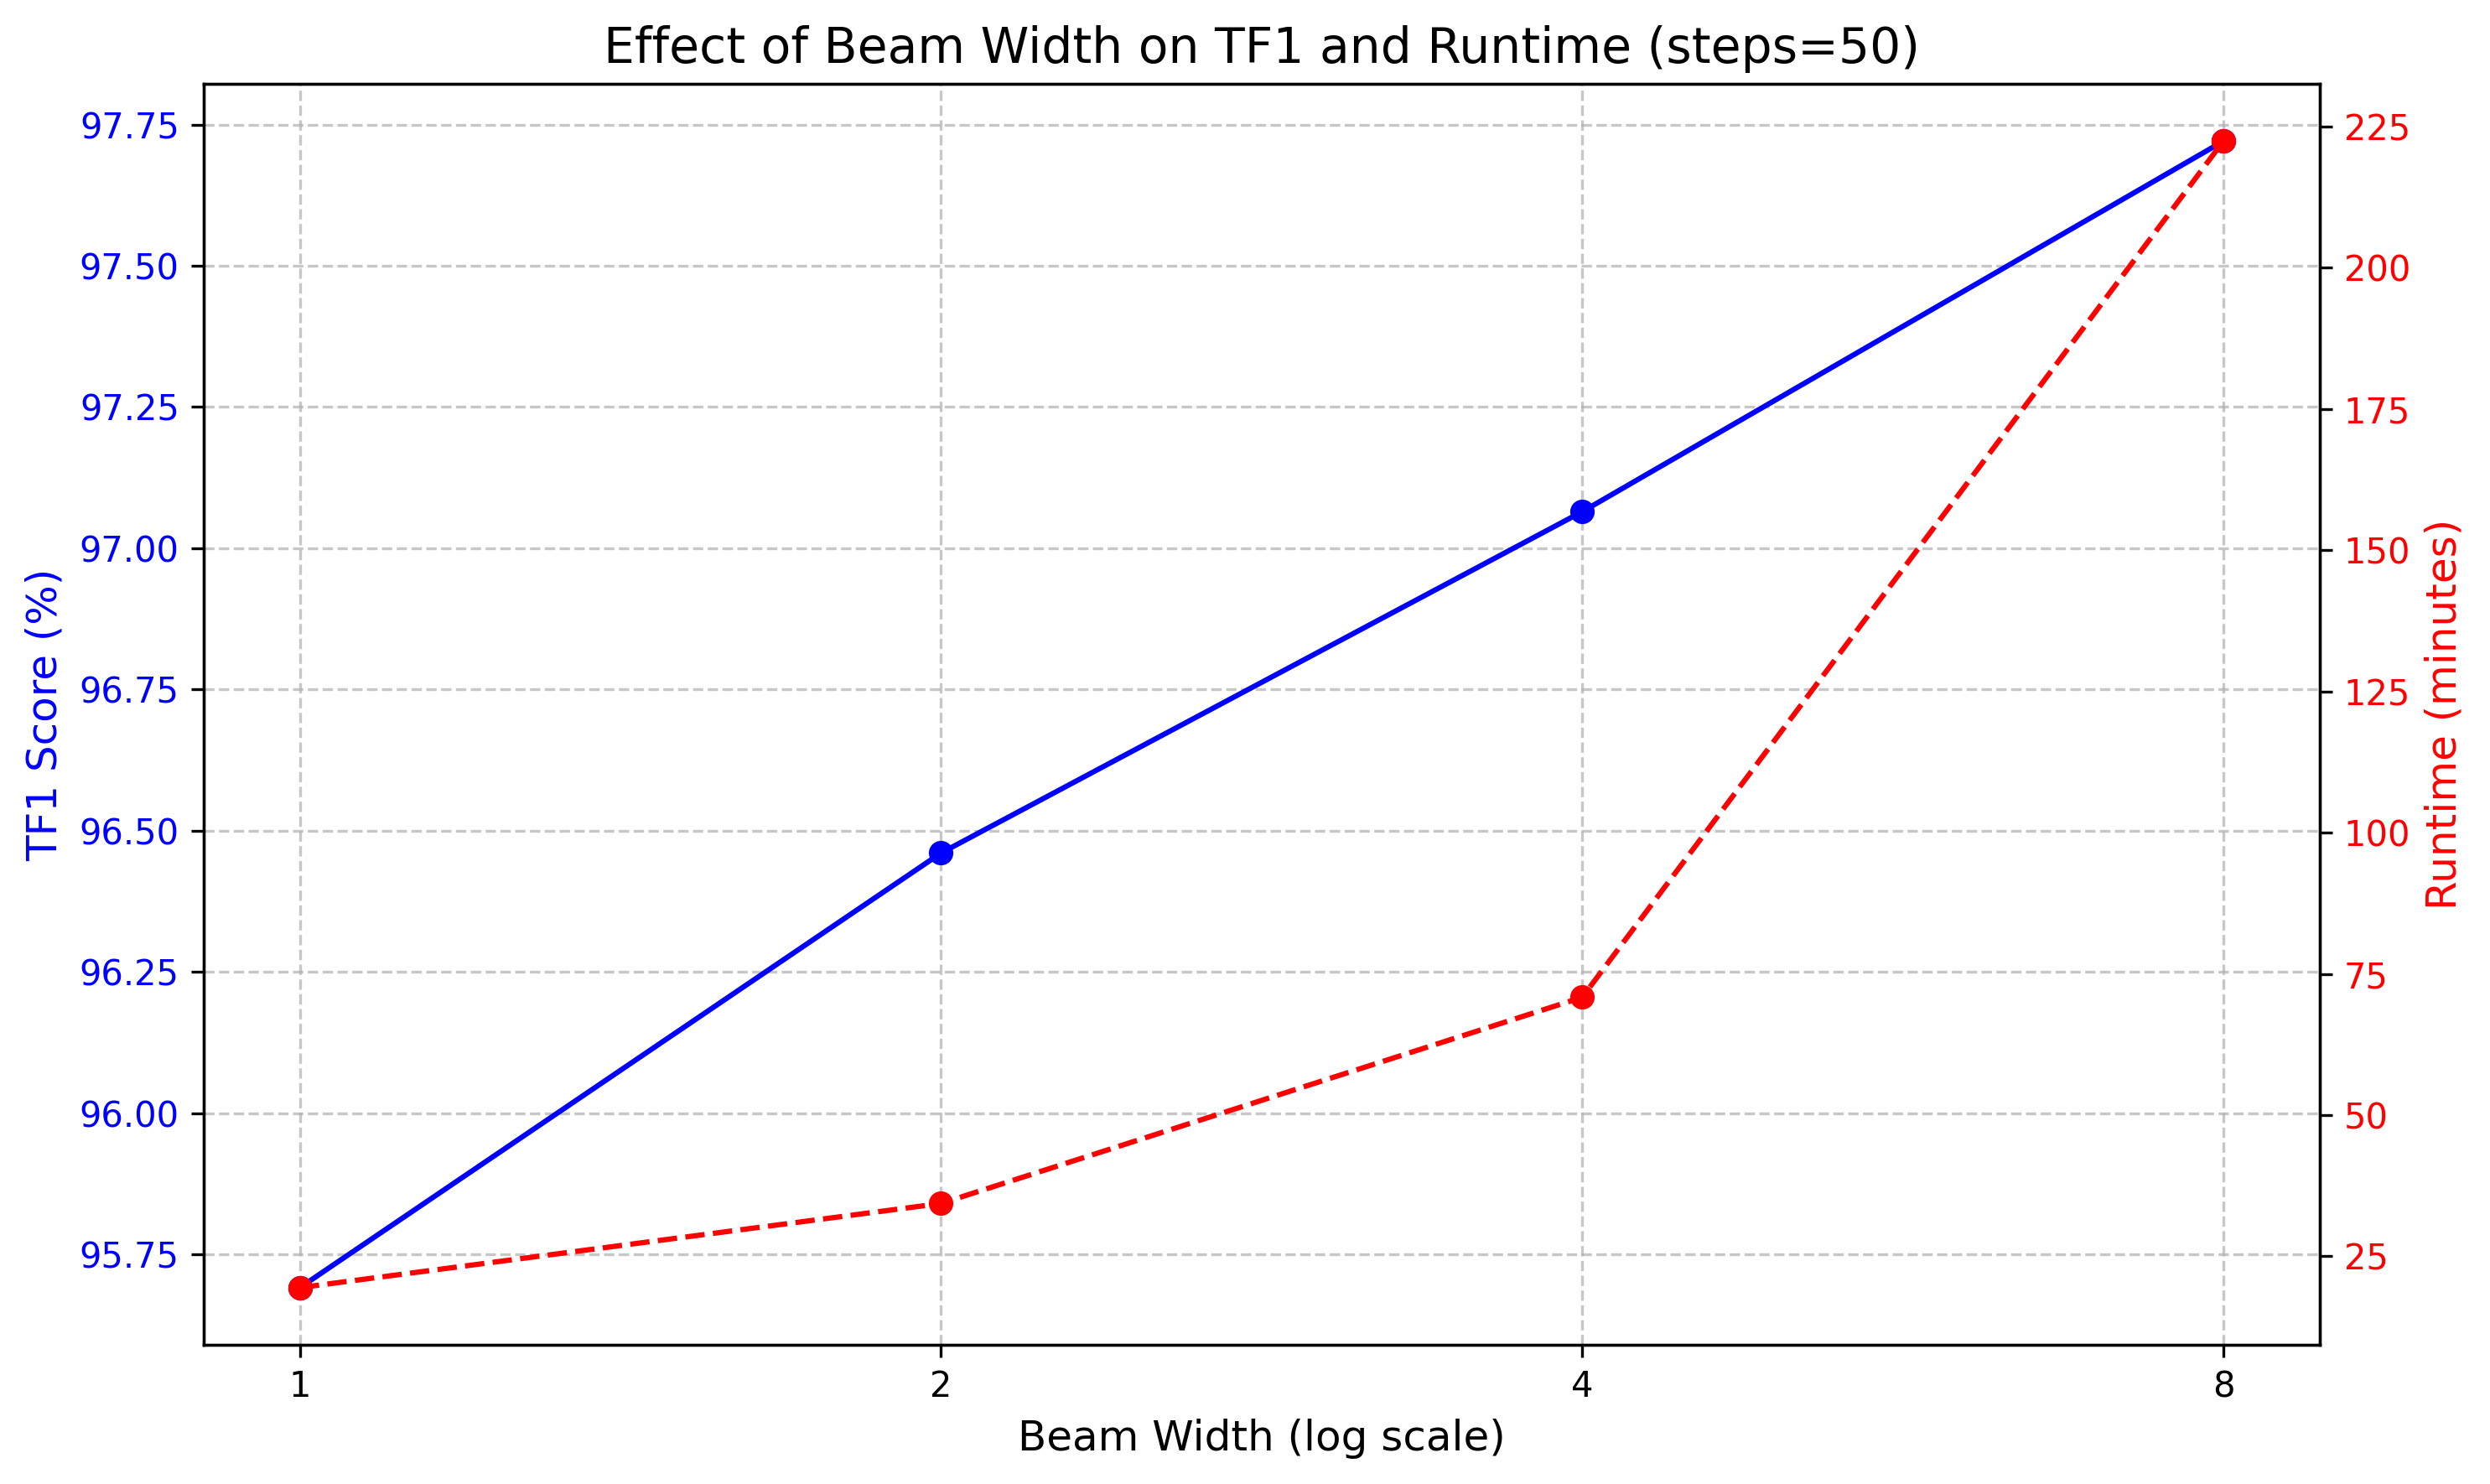

In [4]:
fig, ax1 = plt.subplots(figsize=(10, 6), dpi=300)

ax1.set_title('Effect of Beam Width on TF1 and Runtime (steps=50)', fontsize=14)
ax1.set_xlabel('Beam Width (log scale)', fontsize=12)
ax1.set_xscale('log')
ax1.set_xticks([1, 2, 4, 8])
ax1.get_xaxis().set_major_formatter(plt.ScalarFormatter())
ax1.get_xaxis().set_minor_formatter(plt.NullFormatter())
ax1.tick_params(axis='x', which='minor', bottom=False)

# TF1 Score on the left y-axis
ax1.set_ylabel('TF1 Score (%)', fontsize=12, color='blue')
ax1.plot(data['Beam'], data['TF1'] * 100, 'o-', color='blue', label='TF1 Score')
ax1.tick_params(axis='y', labelcolor='blue')

# Runtime on the right y-axis
ax2 = ax1.twinx()
ax2.set_ylabel('Runtime (minutes)', fontsize=12, color='red')
ax2.plot(data['Beam'], data['Runtime (min)'], 'o--', color='red', label='Runtime')
ax2.tick_params(axis='y', labelcolor='red')

# Gridlines and layout
ax1.grid(visible=True, linestyle='--', alpha=0.7)
fig.tight_layout()
plt.show()

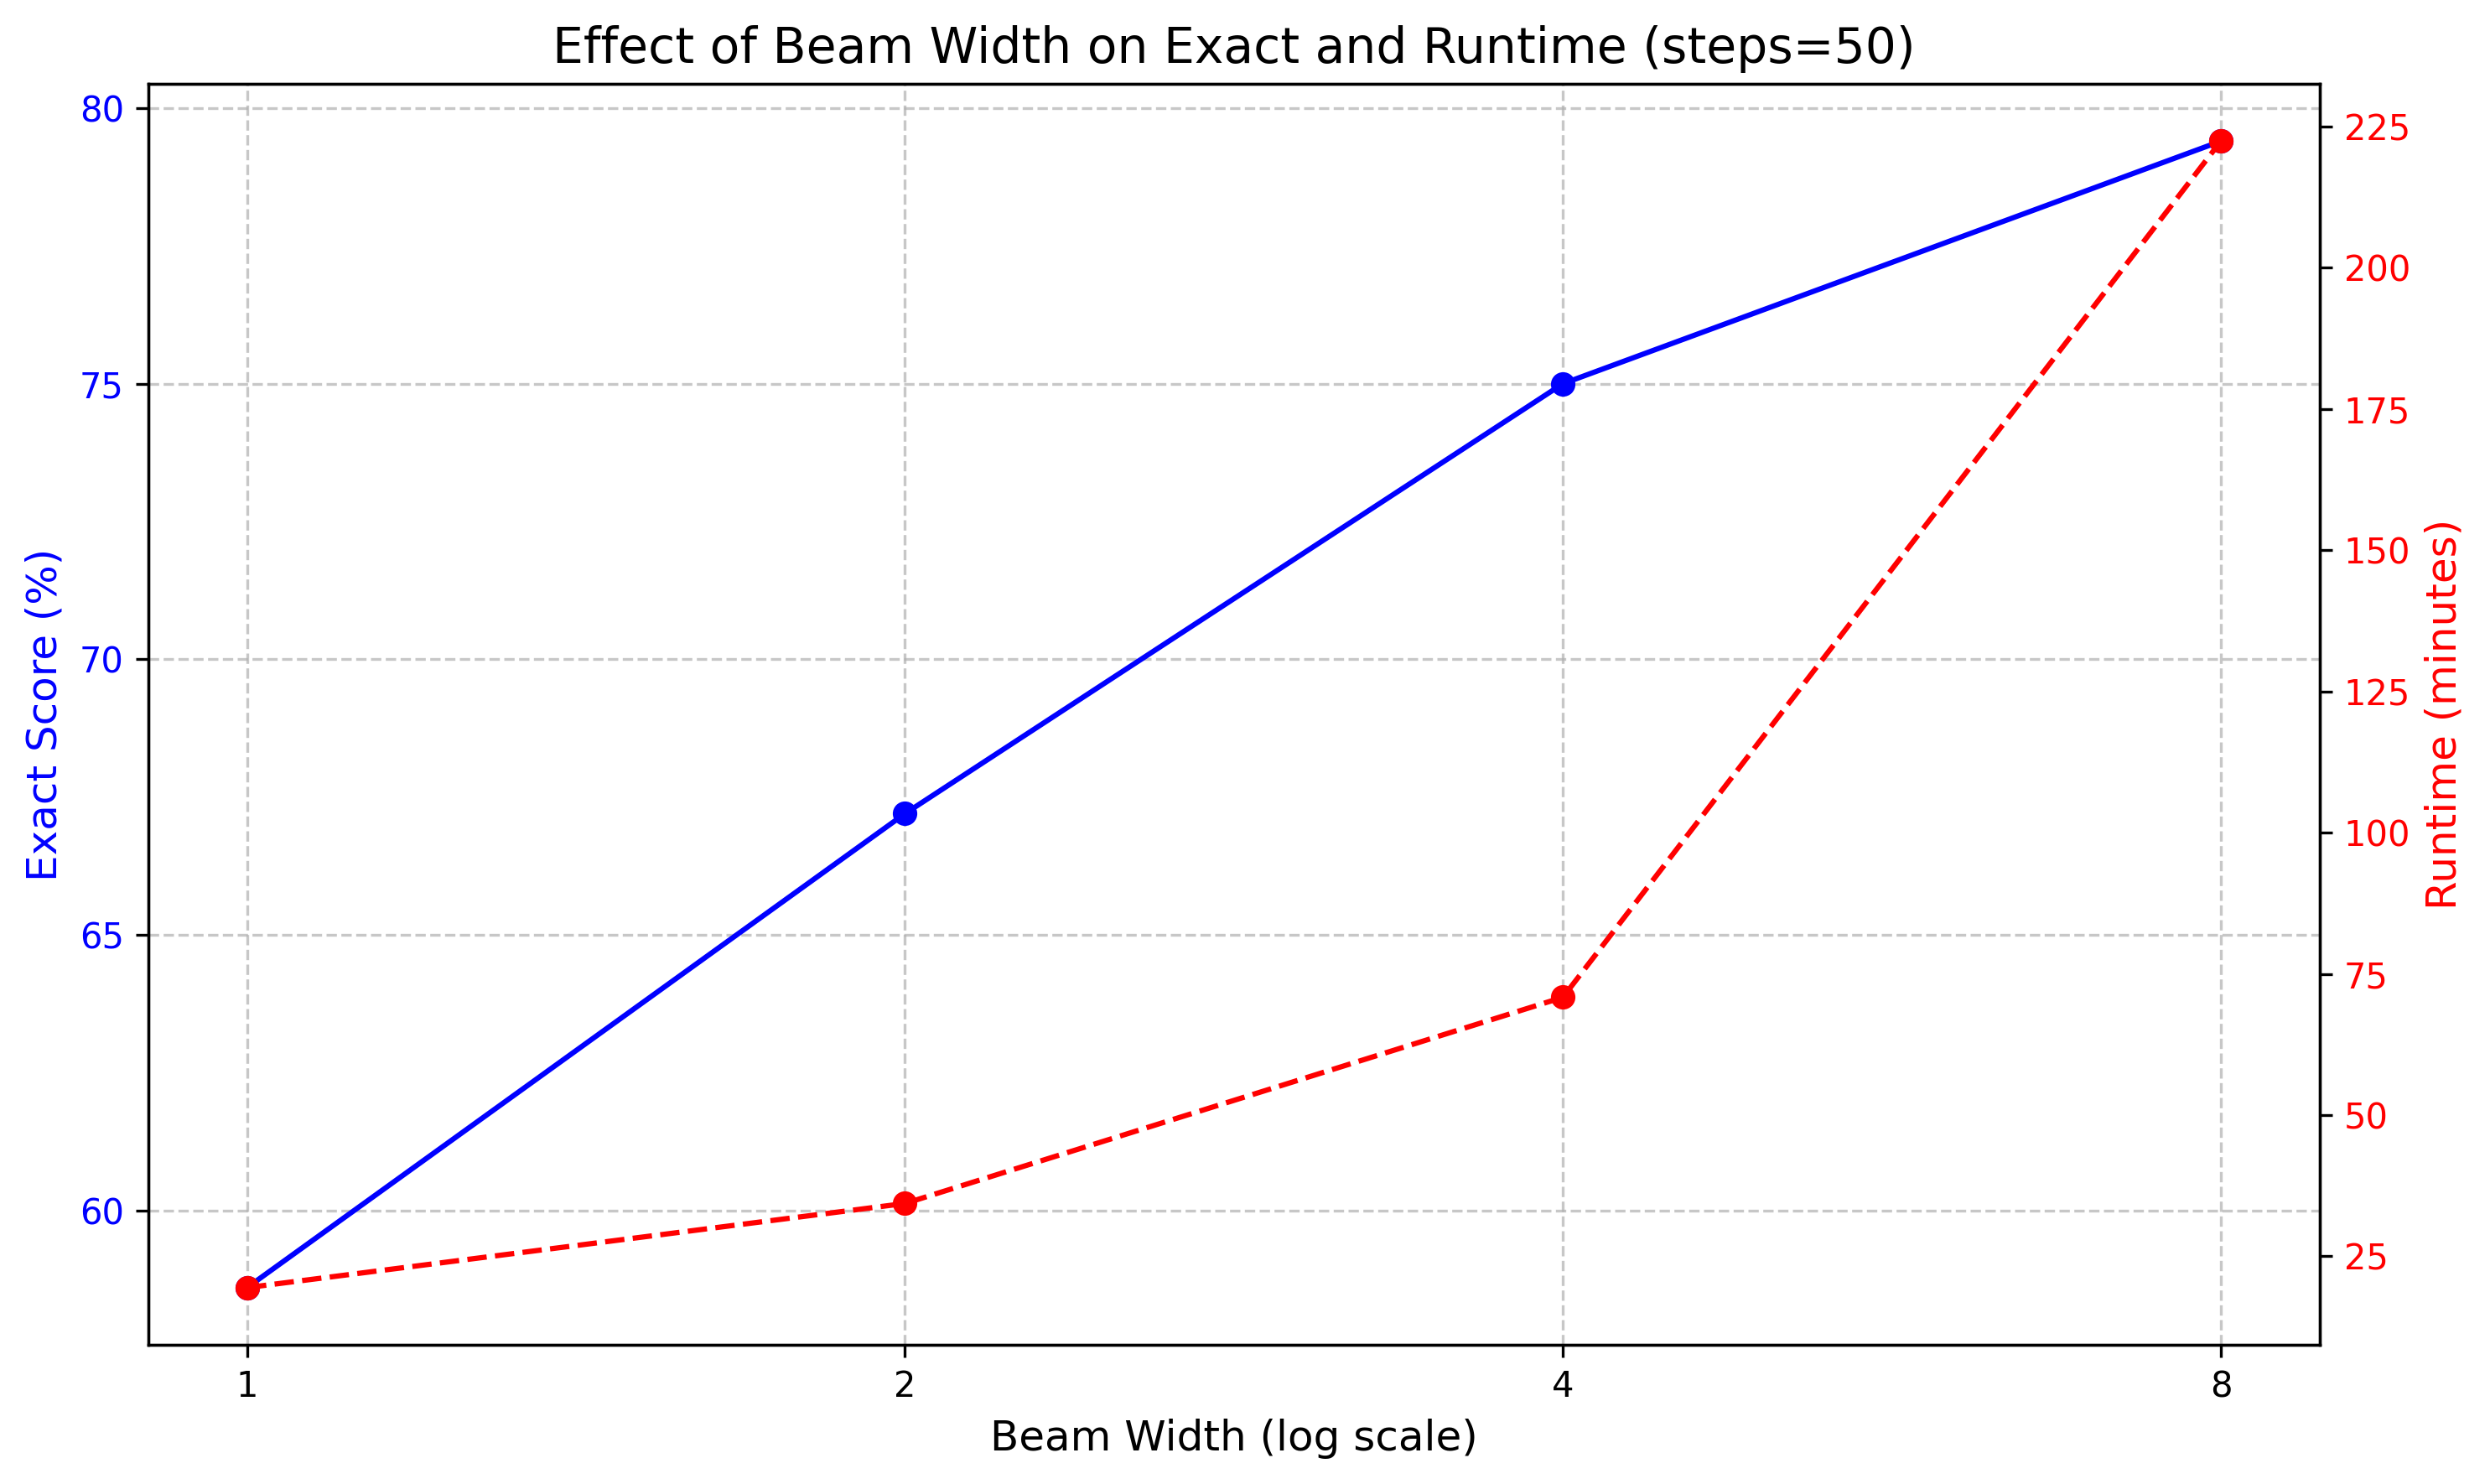

In [5]:
fig, ax1 = plt.subplots(figsize=(10, 6), dpi=300)

ax1.set_title('Effect of Beam Width on Exact and Runtime (steps=50)', fontsize=14)
ax1.set_xlabel('Beam Width (log scale)', fontsize=12)
ax1.set_xscale('log')
ax1.set_xticks([1, 2, 4, 8])
ax1.get_xaxis().set_major_formatter(plt.ScalarFormatter())
ax1.get_xaxis().set_minor_formatter(plt.NullFormatter())
ax1.tick_params(axis='x', which='minor', bottom=False)

# Exact Score on the left y-axis
ax1.set_ylabel('Exact Score (%)', fontsize=12, color='blue')
ax1.plot(data['Beam'], data['Exact'] * 100, 'o-', color='blue', label='Exact Score')
ax1.tick_params(axis='y', labelcolor='blue')

# Runtime on the right y-axis
ax2 = ax1.twinx()
ax2.set_ylabel('Runtime (minutes)', fontsize=12, color='red')
ax2.plot(data['Beam'], data['Runtime (min)'], 'o--', color='red', label='Runtime')
ax2.tick_params(axis='y', labelcolor='red')

# Gridlines and layout
ax1.grid(visible=True, linestyle='--', alpha=0.7)
fig.tight_layout()
plt.show()

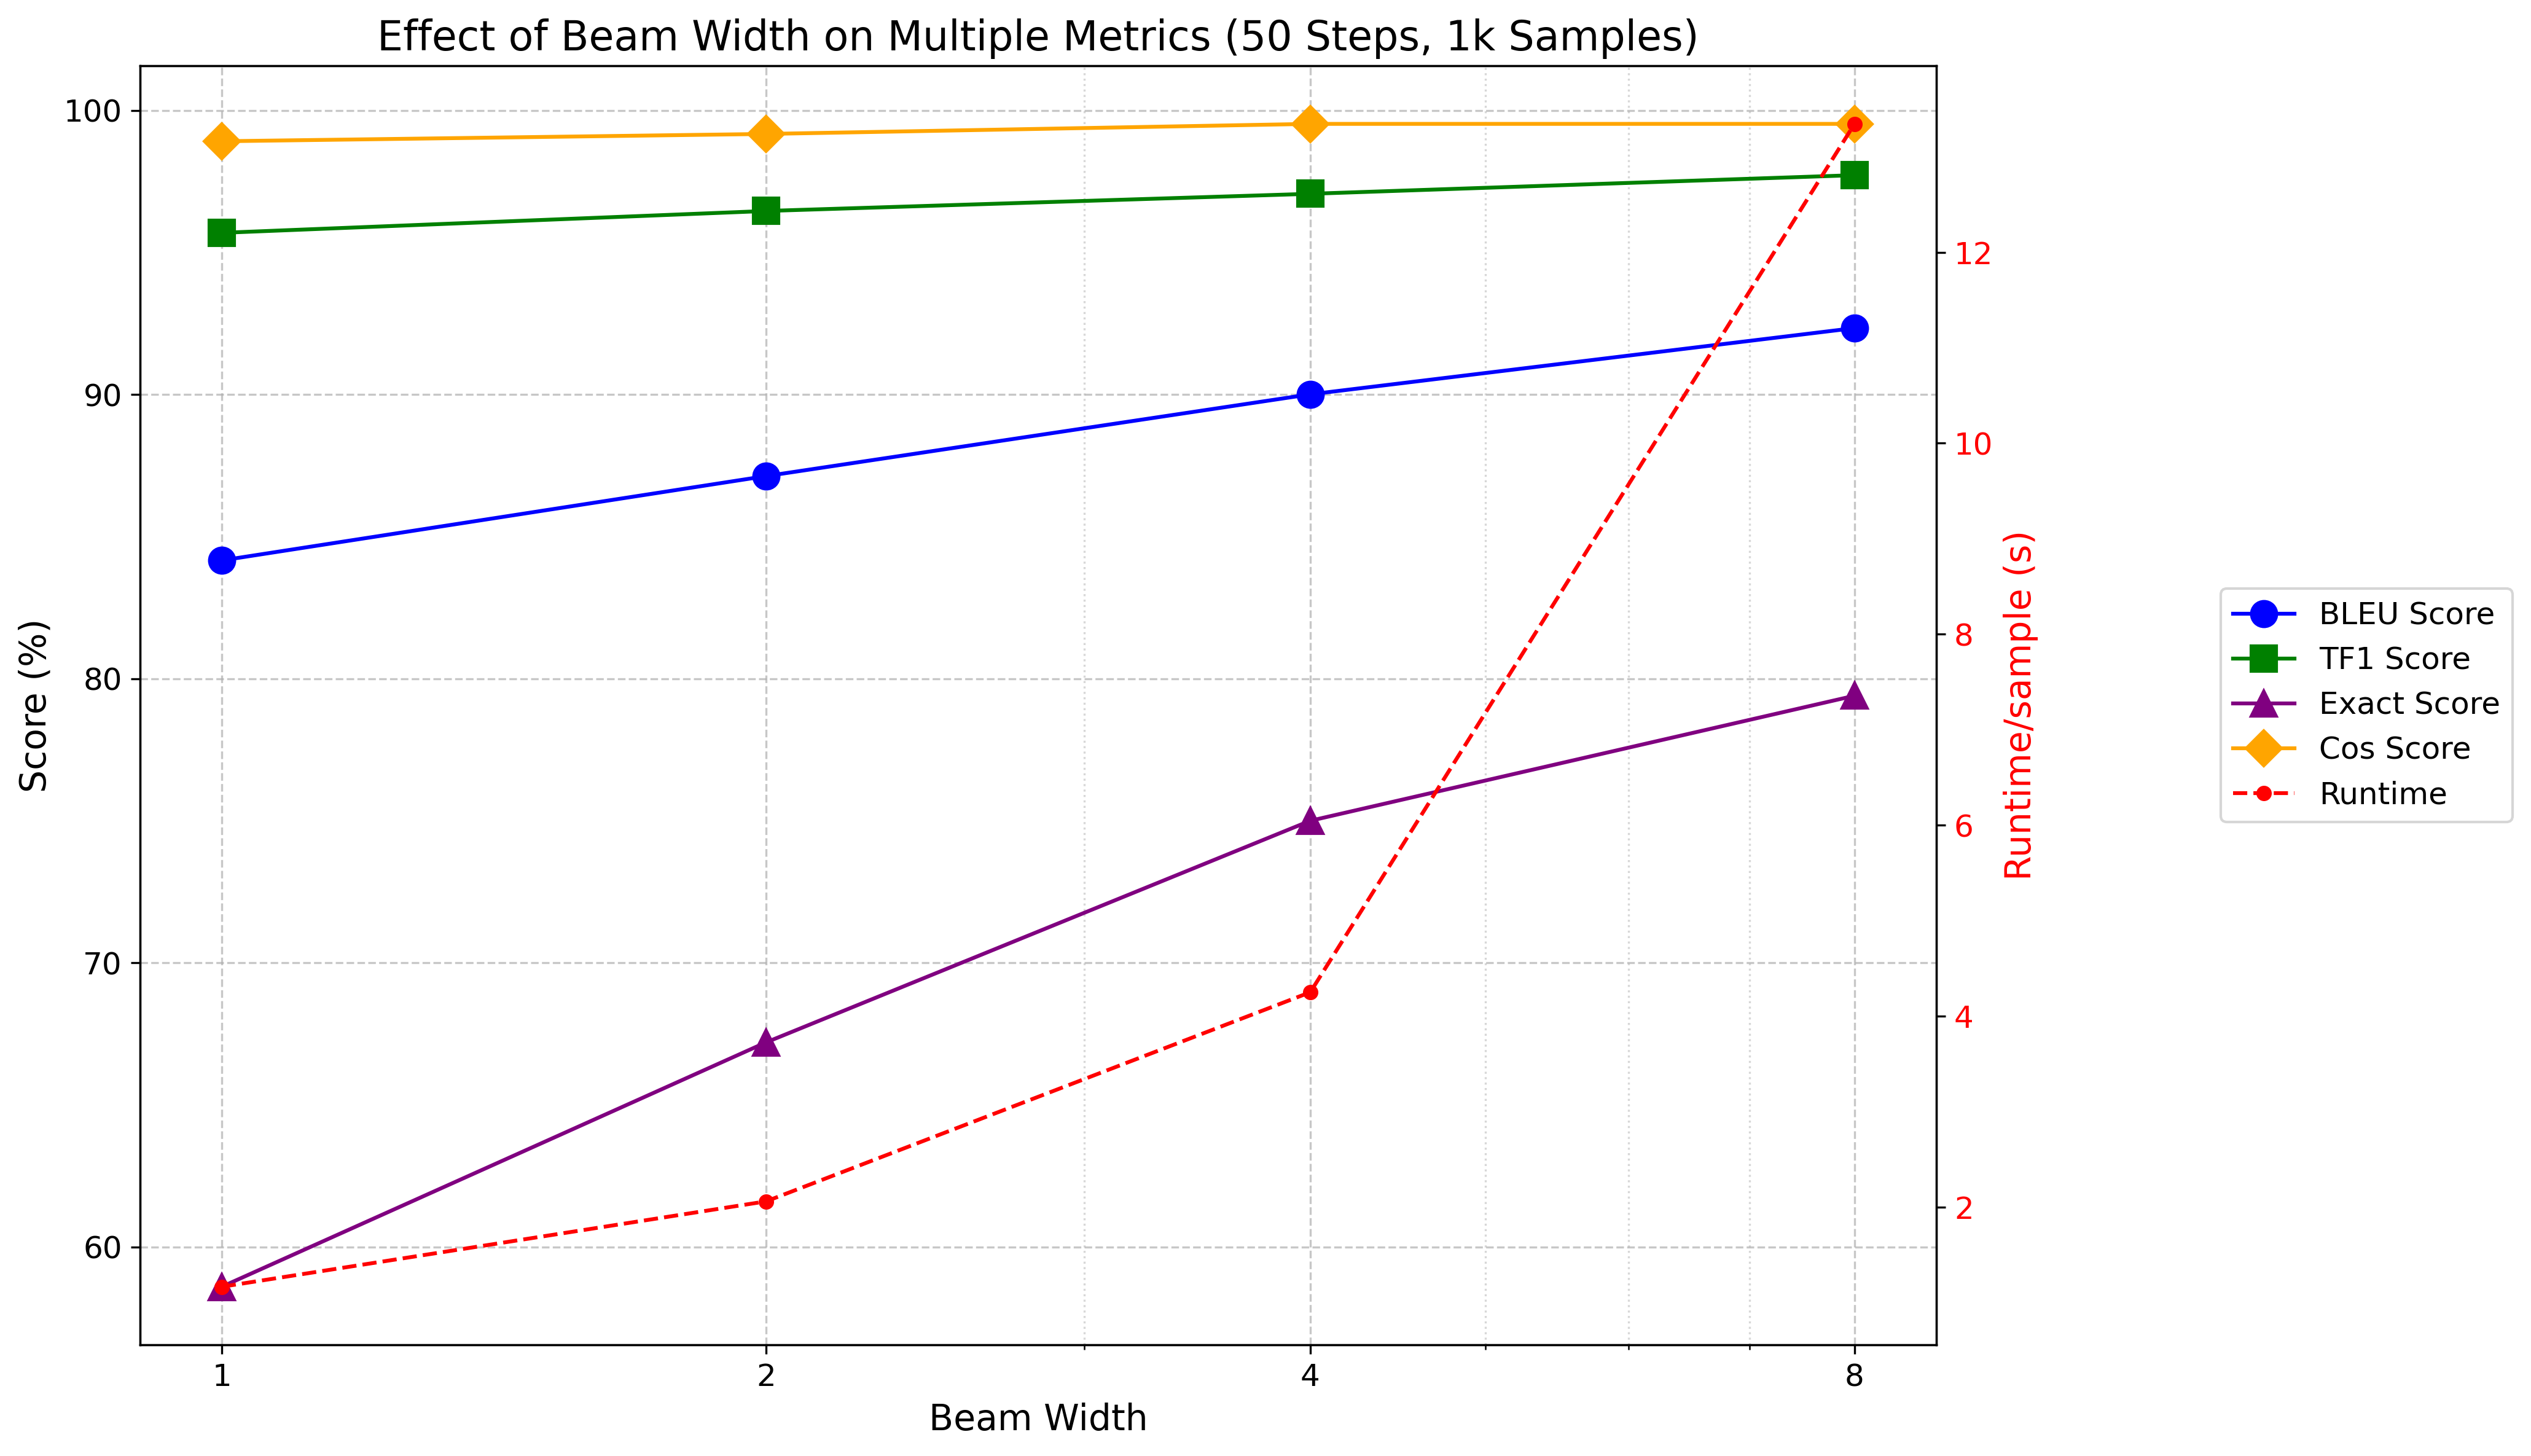

In [19]:
# Scale all metrics to 0-100
scaled_data = data.copy()
metrics = ['BLEU', 'TF1', 'Exact', 'Cos']
colors = ['blue', 'green', 'purple', 'orange']
markers = ['o', 's', '^', 'D']

fig, ax1 = plt.subplots(figsize=(14, 8), dpi=300)

# Plot each metric
for metric, color, marker in zip(metrics, colors, markers):
    ax1.plot(data['Beam'], data[metric] * 100, 
             marker=marker, linestyle='-', 
             color=color, label=f'{metric} Score',
             markersize=10)

# Titles and labels
ax1.set_title('Effect of Beam Width on Multiple Metrics (50 Steps, 1k Samples)', fontsize=16)
ax1.set_xlabel('Beam Width', fontsize=14)
ax1.set_ylabel('Score (%)', fontsize=14)
ax1.set_xscale('log')

# Set major ticks and labels
ax1.set_xticks([1, 2, 4, 8])
ax1.set_xticklabels([1, 2, 4, 8], fontsize=12)

# Add minor ticks at all integers between 1 and 8
ax1.xaxis.set_minor_locator(plt.MultipleLocator(1))

# Remove labels from minor ticks
ax1.tick_params(axis='x', which='minor', bottom=True, labelbottom=False)

# Add both major and minor grid lines
ax1.grid(visible=True, which='major', linestyle='--', alpha=0.7)
ax1.grid(visible=True, which='minor', linestyle=':', alpha=0.5)

# Adjust y-axis ticks
ax1.tick_params(axis='y', labelsize=12)

# Runtime on the right y-axis
ax2 = ax1.twinx()
ax2.set_ylabel('Runtime/sample (s)', fontsize=14, color='red')
ax2.plot(data['Beam'], data['Runtime per sample (s)'], '.--', 
         color='red', label='Runtime', markersize=10)
ax2.tick_params(axis='y', labelcolor='red', labelsize=12)

# Combine legends from both axes
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, 
           loc='center left', bbox_to_anchor=(1.15, 0.5),
           fontsize=12)

# Suppress scientific notation on x-axis
ax1.get_xaxis().set_major_formatter(plt.ScalarFormatter())
ax1.get_xaxis().set_minor_formatter(plt.NullFormatter())

# Tight layout to avoid overlaps
fig.tight_layout()
plt.show()


In [12]:
plt.savefig('repro_results/combined_metrics.png', dpi=300, bbox_inches='tight')


<Figure size 640x480 with 0 Axes>

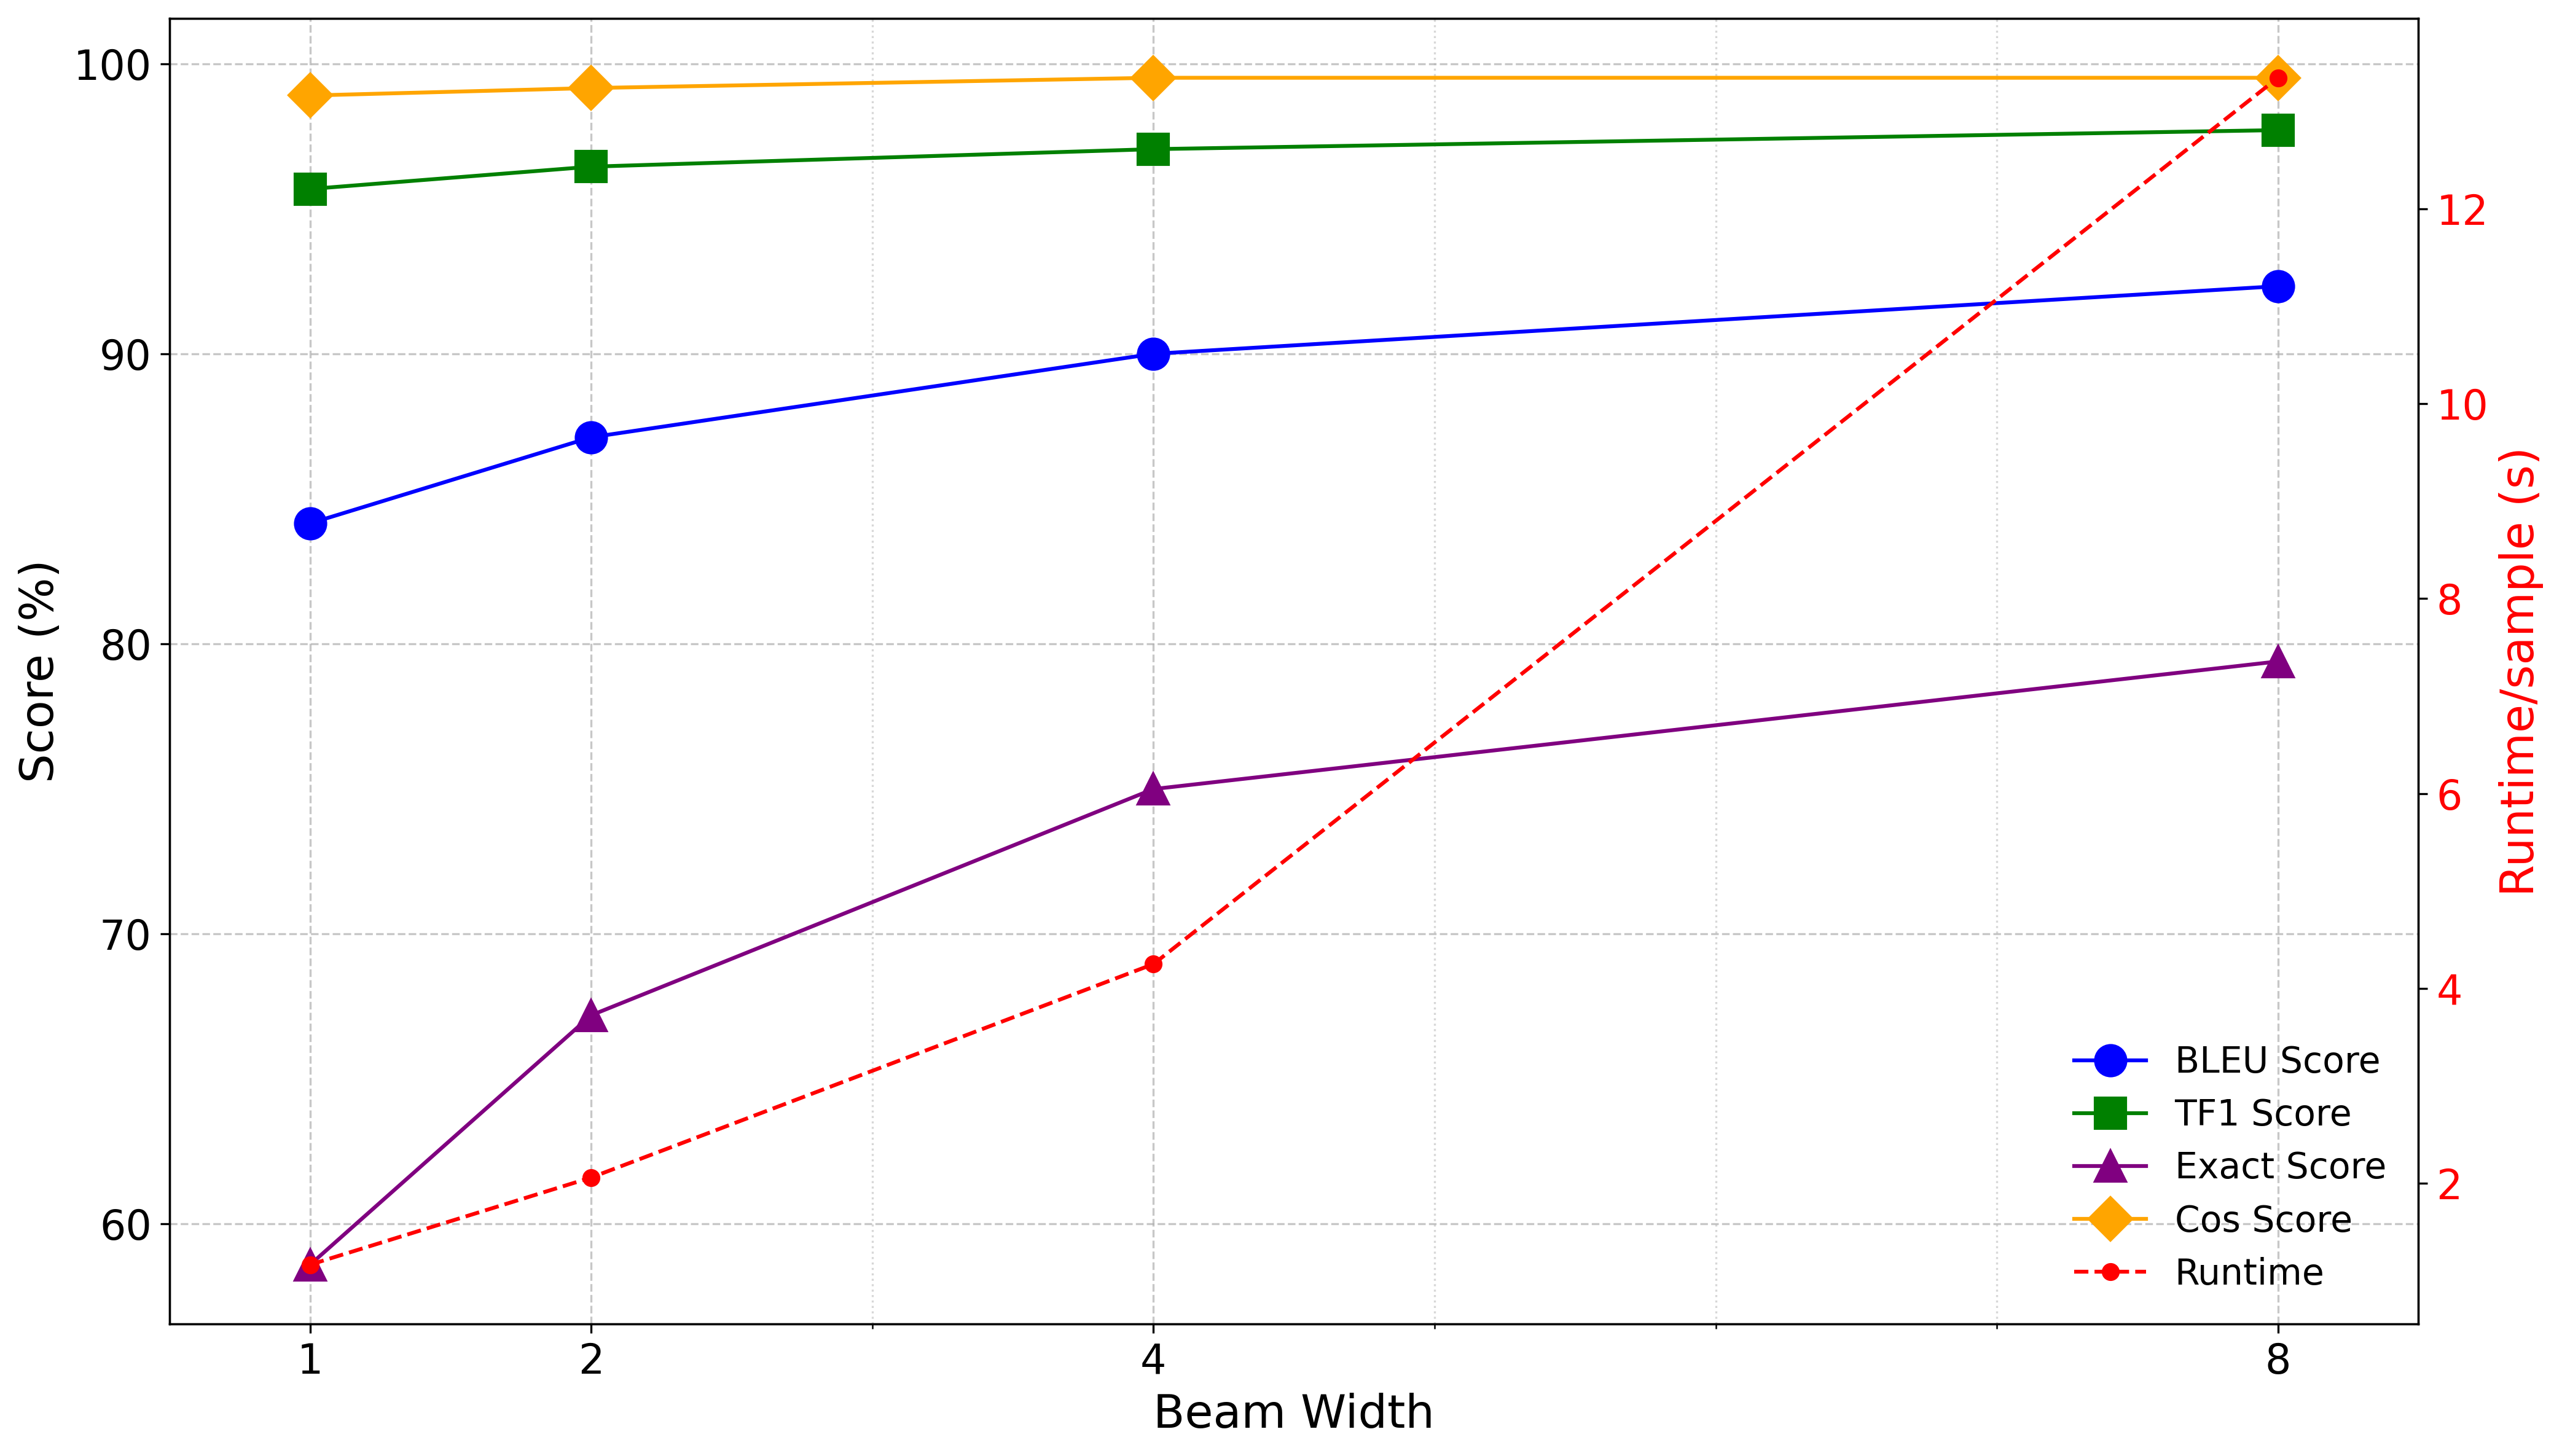

In [ ]:
# Scale all metrics to 0-100
scaled_data = data.copy()
metrics = ['BLEU', 'TF1', 'Exact', 'Cos']
colors = ['blue', 'green', 'purple', 'orange']
markers = ['o', 's', '^', 'D']

fig, ax1 = plt.subplots(figsize=(14, 8), dpi=300)

# Plot each metric
for metric, color, marker in zip(metrics, colors, markers):
    ax1.plot(data['Beam'], data[metric] * 100,
             marker=marker, linestyle='-',
             color=color, label=f'{metric} Score',
             markersize=12)

# Labels for axes
ax1.set_xlabel('Beam Width', fontsize=18)
ax1.set_ylabel('Score (%)', fontsize=18)

# Adjust tick parameters
ax1.set_xticks([1, 2, 4, 8])
ax1.set_xticklabels([1, 2, 4, 8], fontsize=16)
ax1.xaxis.set_minor_locator(plt.MultipleLocator(1))
ax1.tick_params(axis='x', which='minor', bottom=True, labelbottom=False)
ax1.tick_params(axis='y', labelsize=16)

# Add grid lines
ax1.grid(visible=True, which='major', linestyle='--', alpha=0.7)
ax1.grid(visible=True, which='minor', linestyle=':', alpha=0.5)

# Runtime on the right y-axis
ax2 = ax1.twinx()
ax2.set_ylabel('Runtime/sample (s)', fontsize=18, color='red')
ax2.plot(data['Beam'], data['Runtime per sample (s)'], '.--',
         color='red', label='Runtime', markersize=12)
ax2.tick_params(axis='y', labelcolor='red', labelsize=16)

# Combine legends from both axes
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2,
           loc='lower right', fontsize=14, frameon=False)

# Adjust x-axis limits
ax1.set_xlim(0.5, 8.5)

# Tight layout to avoid overlaps
fig.tight_layout()
plt.show()


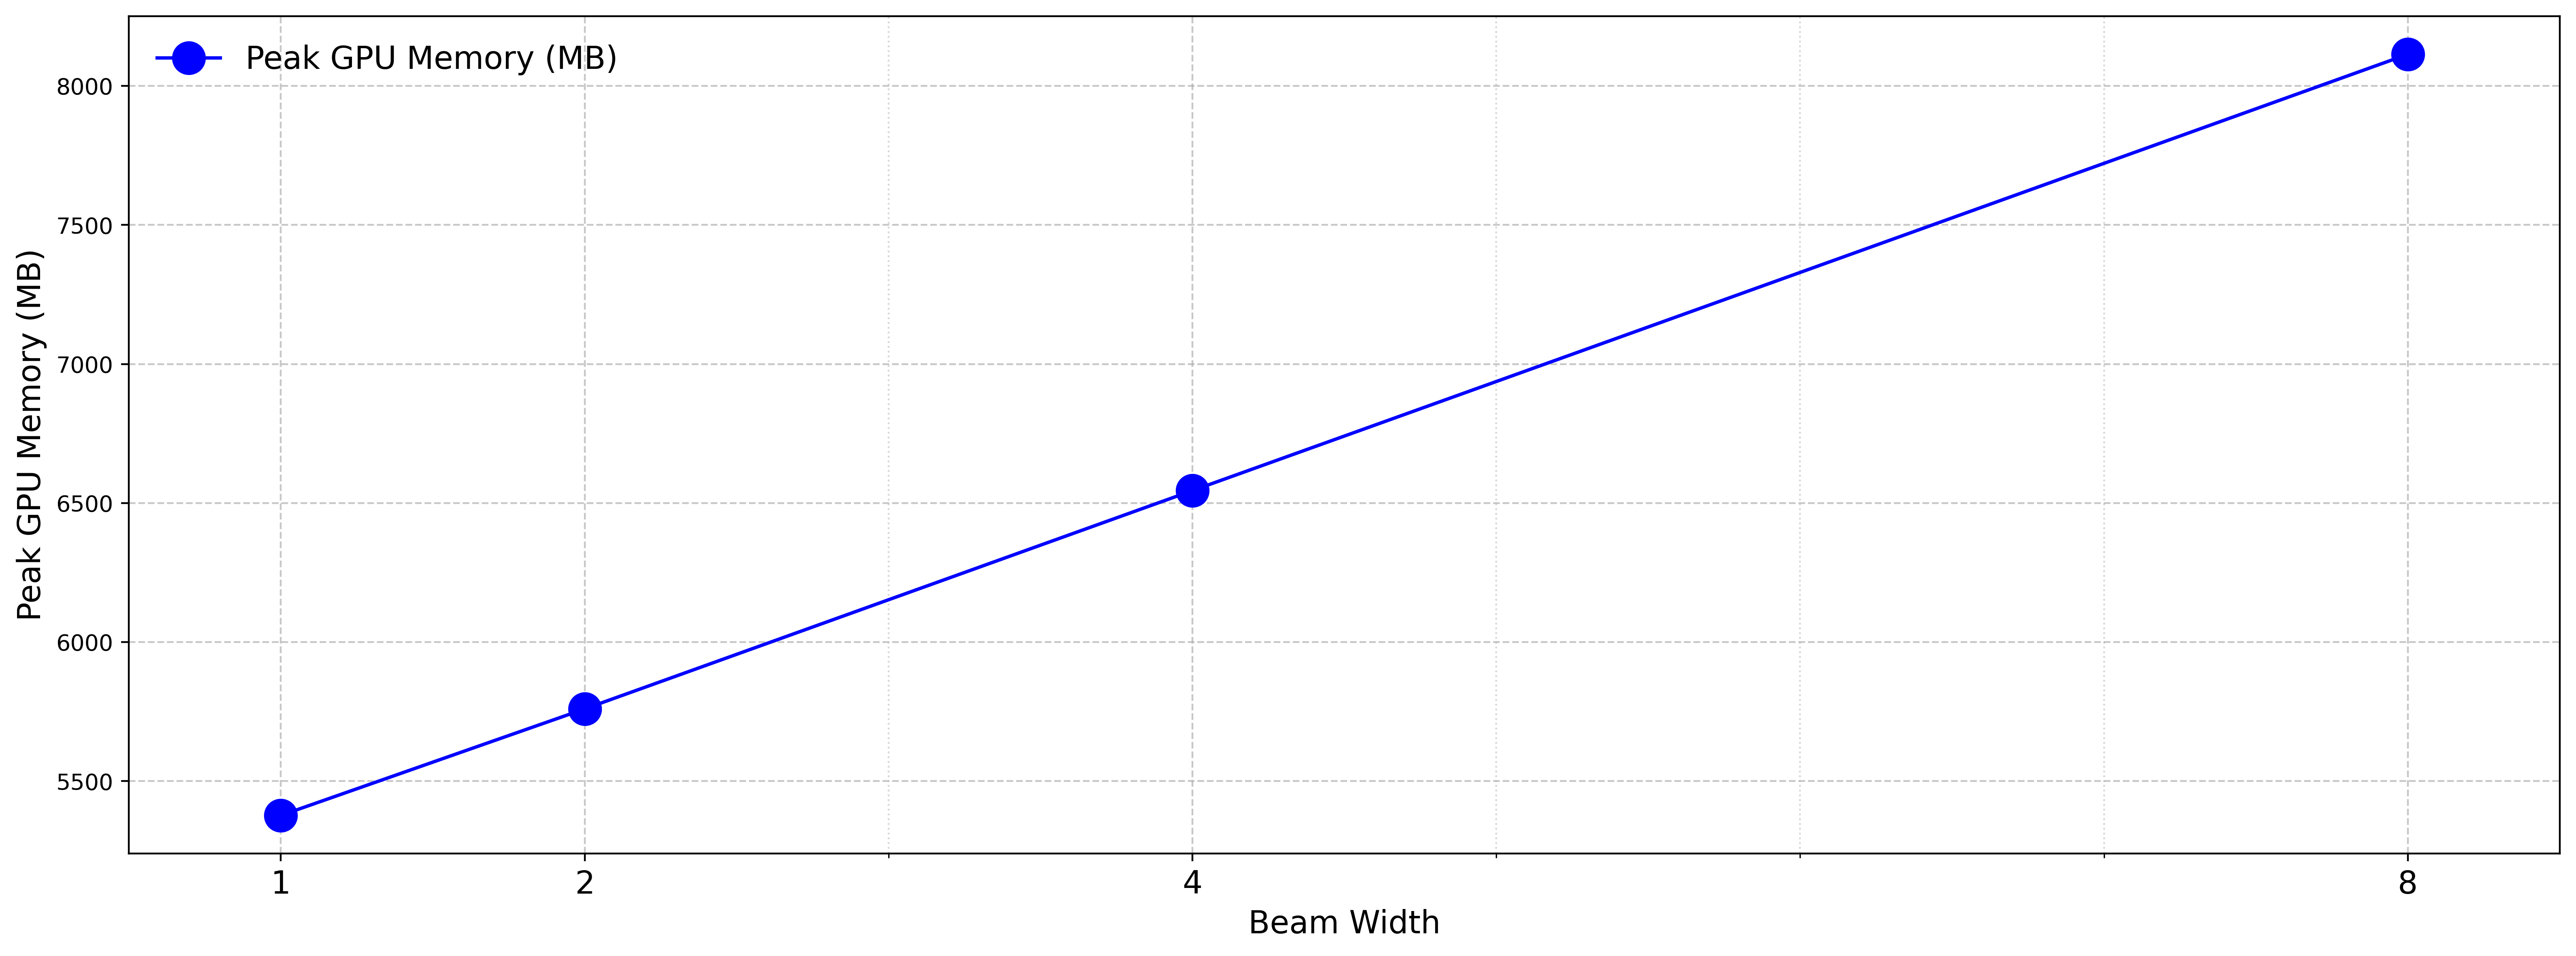

In [5]:
# Data
beam_width = [1, 2, 4, 8]
peak_gpu_memory = [5377, 5760, 6545, 8114]

fig, ax = plt.subplots(figsize=(16, 6), dpi=400)  # Wide and thin

# Plot Peak GPU Memory
ax.plot(beam_width, peak_gpu_memory, marker='o', linestyle='-', color='blue',
        label='Peak GPU Memory (MB)', markersize=10)

# Titles and labels
# ax.set_title('Effect of Beam Width on Peak GPU Memory Usage (1 Step, 1k Samples)', fontsize=16)
ax.set_xlabel('Beam Width', fontsize=14)
ax.set_ylabel('Peak GPU Memory (MB)', fontsize=14)

# X-axis formatting
ax.set_xticks(beam_width)
ax.set_xticklabels(beam_width, fontsize=14)
ax.xaxis.set_minor_locator(plt.MultipleLocator(1))

# Gridlines
ax.grid(visible=True, which='major', linestyle='--', alpha=0.7)
ax.grid(visible=True, which='minor', linestyle=':', alpha=0.5)

# Legend placement
ax.legend(loc='upper left', fontsize=14, frameon=False)

# Adjust limits
ax.set_xlim(0.5, 8.5)

# Tight layout
fig.tight_layout()
plt.show()